In [69]:
from __future__ import print_function, division, absolute_import
import pandas as pd
import numpy as np
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
products = pd.read_csv('amazon_baby.csv', index_col=False)

In [5]:
train_idx = pd.read_json('module-9-assignment-train-idx.json')[0].values.tolist()
test_idx = pd.read_json('module-9-assignment-test-idx.json')[0].values.tolist()

In [6]:
products.head(1)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3


In [7]:
products = products[products.rating != 3]

In [8]:
## restting the index, to make sure all indexs between o to len(product)-1 is present
products.reset_index(drop=True, inplace=True)

In [9]:
products['sentiment'] = products['rating'].apply(lambda x : 1 if x >=4 else -1)

In [10]:
products.head()

,name,review,rating,sentiment
0,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1
1,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1
2,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,1


In [11]:
products[products.rating <3].head()

,name,review,rating,sentiment
19,Nature's Lullabies Second Year Sticker Calendar,I only purchased a second-year calendar for my...,2,-1
36,"SoftPlay Giggle Jiggle Funbook, Happy Bear",This bear is absolutely adorable and I would g...,2,-1
45,"SoftPlay Cloth Book, Love",This book is boring. Nothing to stimulate my g...,1,-1
63,Hunnt&reg; Falling Flowers and Birds Kids Nurs...,The reason:Small sizeHard to apply on the wall...,1,-1
64,Wall Decor Removable Decal Sticker - Colorful ...,Would not purchase again or recommend. The dec...,2,-1


In [12]:
products.review.fillna(' ', inplace=True)

In [13]:
def remove_punctuation(text):
    return text.translate(None, string.punctuation)

In [14]:
products['review_clean'] = products['review'].apply(remove_punctuation)

In [15]:
products.review_clean.loc[0]

'it came early and was not disappointed i love planet wise bags and now my wipe holder it keps my osocozy wipes moist and does not leak highly recommend it'

In [16]:
train_data = products.loc[train_idx]
test_data = products.loc[test_idx]


In [113]:
## creating bag of words based matrix from training data

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

In [114]:
train_matrix = vectorizer.fit_transform(train_data.review_clean)

In [115]:
train_matrix

<133416x121712 sparse matrix of type '<type 'numpy.int64'>'
	with 7326618 stored elements in Compressed Sparse Row format>

In [116]:
test_matrix = vectorizer.transform(test_data.review_clean)

In [21]:
sentiment_lr = LogisticRegression()

In [22]:
sentiment_lr.fit(train_matrix, train_data.sentiment)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
accuracy = accuracy_score(y_true = test_data.sentiment, y_pred=sentiment_lr.predict(test_matrix))

In [24]:
accuracy

0.93244540436765055

In [25]:
baseline = len(test_data[test_data.sentiment==1])/len(test_data)

In [26]:
baseline

0.8427825773938085

Yes our model is better than the baseline model

In [27]:
## creating confusion matrix
test_data['sentiment_pred'] = sentiment_lr.predict(test_matrix)

In [28]:
test_data.head()

,name,review,rating,sentiment,review_clean,sentiment_pred
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,1,This has been an easy way for my nanny to reco...,1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,1,I love this journal and our nanny uses it ever...,1
14,Nature's Lullabies First Year Sticker Calendar,"I love this little calender, you can keep trac...",5,1,I love this little calender you can keep track...,1
18,Nature's Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,1,I had a hard time finding a second year calend...,1
24,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,1


In [29]:
recall = test_data[(test_data.sentiment==1)&(test_data.sentiment_pred==1)].shape[0]/test_data[test_data.sentiment==1].shape[0]
precision = test_data[(test_data.sentiment_pred==1) & (test_data.sentiment==1)].shape[0]/test_data[test_data.sentiment_pred==1].shape[0]

In [30]:
recall

0.9715251824168002

In [31]:
precision

0.9494903816050371

In [32]:
tp = test_data[(test_data.sentiment==1) &(test_data.sentiment_pred==1)].shape[0]
fp = test_data[(test_data.sentiment ==-1) &(test_data.sentiment_pred==1)].shape[0]

tn = test_data[(test_data.sentiment==-1) &(test_data.sentiment_pred==-1)].shape[0]
fn = test_data[(test_data.sentiment==1) & (test_data.sentiment_pred==-1)].shape[0]

In [33]:
tp/(tp+fp)

0.9494903816050371

In [34]:
tp/(tp+fn)

0.9715251824168002

In [35]:
print("|------------------------------------------|")
print("|             predicted                    |")
print("|------------------------------------------|")
print("| Actual")

|------------------------------------------|
|             predicted                    |
|------------------------------------------|
| Actual


In [36]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_true = test_data.sentiment, y_pred = sentiment_lr.predict(test_matrix), labels=sentiment_lr.classes_)

In [37]:
print(' target_label | predicted_label | count ')
print( '--------------+-----------------+-------')
# Print out the confusion matrix.
# NOTE: Your tool may arrange entries in a different order. Consult appropriate manuals.
for i, target_label in enumerate(sentiment_lr.classes_):
    for j, predicted_label in enumerate(sentiment_lr.classes_):
        print ('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))

 target_label | predicted_label | count 
--------------+-----------------+-------
     -1       |       -1        |  3789
     -1       |        1        |  1452
      1       |       -1        |   800
      1       |        1        | 27295


In [38]:
print("1. False Positive:: %i" %fp)

1. False Positive:: 1452


In [132]:
print("2. Cost of current prediction:: %i" %(fp*100 + fn*1))

2. Cost of current prediction:: 146000


In [40]:
precision_sk = precision_score(y_true=test_data.sentiment, y_pred = test_data.sentiment_pred)

In [41]:
precision

0.9494903816050371

In [42]:
print("3. Fraction of positive which are false positive :: %f" %(fp/(tp+fp)))

3. Fraction of positive which are false positive :: 0.050510


4. We will increase the cut-off for predicitng positive, thereby reducing the number of positive prediction

In [43]:
recall_sk = recall_score(y_true = test_data.sentiment, y_pred = test_data.sentiment_pred)

In [44]:
recall_sk

0.97152518241680019

In [45]:
print("5. Fraction of positive review that were predicted positive:: %f" %recall)

5. Fraction of positive review that were predicted positive:: 0.971525


In [46]:
print("6. Recall value of the classifier which predicts positive for all reviews:: %f" %1)

6. Recall value of the classifier which predicts positive for all reviews:: 1.000000


In [77]:
def apply_threshold(probability, threshold):
    return np.where(probability >=threshold, 1,-1)

In [48]:
prob = pd.Series(sentiment_lr.predict_proba(test_matrix)[:,1])

In [56]:
test_data['sentiment_05'] = apply_threshold(prob, 0.5)

In [57]:
test_data['sentiment_09'] = apply_threshold(prob, 0.9)

In [58]:
test_data.head()

,name,review,rating,sentiment,review_clean,sentiment_pred,sentimenet_05,sentiment_09,sentiment_05
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,1,This has been an easy way for my nanny to reco...,1,1,-1,1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,4,1,I love this journal and our nanny uses it ever...,1,1,1,1
14,Nature's Lullabies First Year Sticker Calendar,"I love this little calender, you can keep trac...",5,1,I love this little calender you can keep track...,1,1,1,1
18,Nature's Lullabies Second Year Sticker Calendar,I had a hard time finding a second year calend...,5,1,I had a hard time finding a second year calend...,1,1,1,1
24,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,1,1,1,1


In [60]:
print("7. Difference between count of positive sentiment for 0.5 and 0.9:: %i" %(test_data[test_data['sentiment_05']==1].shape[0]-
     test_data[test_data['sentiment_09'] == 1].shape[0]))

7. Difference between count of positive sentiment for 0.5 and 0.9:: 3680


With increase in threshold, number of positive have decreased

In [61]:
precision_05 = test_data[(test_data.sentiment_05==1) & (test_data.sentiment==1)].shape[0]/test_data[test_data.sentiment_05==1].shape[0]

In [62]:
precision_09 = test_data[(test_data.sentiment_09==1) & (test_data.sentiment==1)].shape[0]/test_data[test_data.sentiment_09==1].shape[0]

In [63]:
print("Preicsion for 0.5 is %f and 0.9 is %f" %(precision_05, precision_09))

Preicsion for 0.5 is 0.949490 and 0.9 is 0.981569


In [64]:
recall_05 = test_data[(test_data.sentiment_05==1) & (test_data.sentiment==1)].shape[0]/test_data[test_data.sentiment==1].shape[0]

In [65]:
recall_09 = test_data[(test_data.sentiment_09==1) & (test_data.sentiment==1)].shape[0]/test_data[test_data.sentiment==1].shape[0]

In [66]:
print("Recall for 0.5 is %f and 0.9 is %f" %(recall_05, recall_09))

Recall for 0.5 is 0.971525 and 0.9 is 0.875779


Precision increases with threshold - has to as in this case we will predict only those which are actually positive
Recall will decrease as will end up predicting fewer positives

In [67]:
threshold_values = np.linspace(0.5,1,num=100)

In [68]:
print(threshold_values)

[ 0.5         0.50505051  0.51010101  0.51515152  0.52020202  0.52525253
  0.53030303  0.53535354  0.54040404  0.54545455  0.55050505  0.55555556
  0.56060606  0.56565657  0.57070707  0.57575758  0.58080808  0.58585859
  0.59090909  0.5959596   0.6010101   0.60606061  0.61111111  0.61616162
  0.62121212  0.62626263  0.63131313  0.63636364  0.64141414  0.64646465
  0.65151515  0.65656566  0.66161616  0.66666667  0.67171717  0.67676768
  0.68181818  0.68686869  0.69191919  0.6969697   0.7020202   0.70707071
  0.71212121  0.71717172  0.72222222  0.72727273  0.73232323  0.73737374
  0.74242424  0.74747475  0.75252525  0.75757576  0.76262626  0.76767677
  0.77272727  0.77777778  0.78282828  0.78787879  0.79292929  0.7979798
  0.8030303   0.80808081  0.81313131  0.81818182  0.82323232  0.82828283
  0.83333333  0.83838384  0.84343434  0.84848485  0.85353535  0.85858586
  0.86363636  0.86868687  0.87373737  0.87878788  0.88383838  0.88888889
  0.89393939  0.8989899   0.9040404   0.90909091  0.

In [ ]:
sentiment_lr.predict_proba

In [72]:
def get_precision_recall( y_data, y_prob, model, threshold):
    y_pred = apply_threshold(y_prob, threshold)
    return precision_score(y_true=y_data, y_pred=y_pred), recall_score(y_true=y_data, y_pred=y_pred)

In [73]:
y_prob = pd.Series(sentiment_lr.predict_proba(test_matrix)[:,1])

In [78]:
precision_all, recall_all =[],[]
for tv in threshold_values:
    v = get_precision_recall(test_data.sentiment, y_prob, sentiment_lr, tv)
    precision_all.append(v[0])
    recall_all.append(v[1])
    
    

In [80]:
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(precision, recall, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.rcParams.update({'font.size': 16})

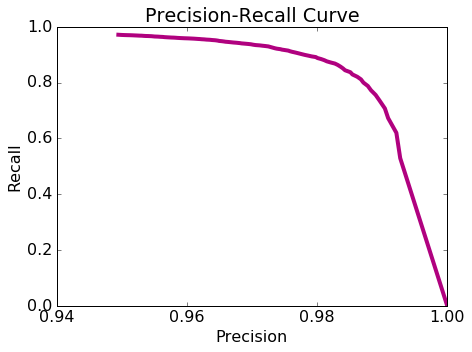

In [81]:
plot_pr_curve(precision_all, recall_all, "Precision-Recall Curve")

In [82]:
np.argwhere(precision_all >0.965)

array([[0]], dtype=int64)

In [87]:
np.argwhere(np.array(precision_all) > 0.965)[0]

array([42], dtype=int64)

In [92]:
print("%f  smallest threshold value that achieves a precision of 0.965 or better" %threshold_values[42])

0.712121  smallest threshold value that achieves a precision of 0.965 or better


In [90]:
precision_all[42]

0.96539855072463765

In [93]:
test_data['sentiment_098'] = apply_threshold(y_prob, 0.98)

In [95]:
print("FN for 0.98 cutoff:: %i" %test_data[(test_data.sentiment_098==-1) & (test_data.sentiment==1)].shape[0])

FN for 0.98 cutoff:: 8257


In [101]:
test_data.name.fillna(' ', inplace=True)

In [102]:
## Evaluating specific terms

baby_reviews = test_data[test_data.name.apply(lambda x : 'baby' in x.lower())]

In [108]:
baby_reviews.head(1)

,name,review,rating,sentiment,review_clean
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,1,This has been an easy way for my nanny to reco...


In [107]:
baby_reviews.drop(['sentiment_pred', 'sentiment_05', 'sentiment_09', 'sentimenet_05', 'sentiment_098'], axis=1, inplace=True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [117]:
baby_matrix = vectorizer.transform(baby_reviews.review_clean)

In [122]:
baby_prob = pd.Series(sentiment_lr.predict_proba(baby_matrix)[:,1])

In [126]:
baby_precision_all, baby_recall_all =[],[]
for tv in threshold_values:
    v = get_precision_recall(baby_reviews.sentiment, baby_prob, sentiment_lr, tv)
    baby_precision_all.append(v[0])
    baby_recall_all.append(v[1])

In [129]:
np.argwhere(np.array(baby_precision_all) > 0.965)[0]

array([45], dtype=int64)

In [130]:
threshold_values[45]

0.72727272727272729

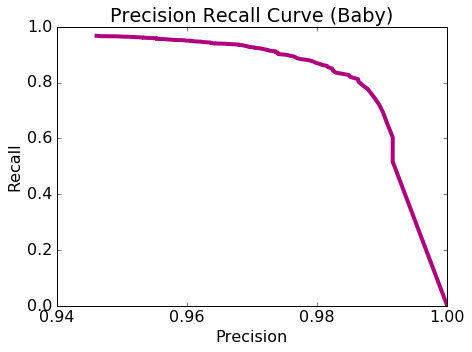

In [131]:
plot_pr_curve(baby_precision_all, baby_recall_all, "Precision Recall Curve (Baby)")